In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate

#Q1

In [ ]:
steps = 40 # for [0,2] this translates to dx = 0.05
x,y = np.meshgrid(np.linspace(0.01,2,steps),np.linspace(0.01,2,steps)) 
J = 1/y
J0 = x/y
beta = 1

zmin = -np.inf
zmax = np.inf

q = np.random.rand(steps,steps)
m = np.random.rand(steps,steps)

In [ ]:
  def q_int(z,Jval,J0val,q,m):
  return np.exp(-z**2/2) * (1/np.cosh(Jval*np.sqrt(q)*z + J0val*m))**2

def m_int(z,Jval,J0val,q,m):
  return np.exp(-z**2/2) * np.tanh(Jval*np.sqrt(q)*z + J0val*m)

cons = 1/np.sqrt(2*np.pi)

N = 100
for iters in range(N):
  if iters%(N/10)==0:
   print(iters/N, 'finished') 
  
  for i in range(steps):
    for j in range(steps):

      q[i][j] = 1 - cons * integrate.quad(q_int,
                                          zmin,zmax,
                                          args=(J[i,j],J0[i,j],q[i,j],m[i,j]))[0]

      m[i][j] = cons * integrate.quad(m_int,
                                      zmin,zmax,
                                      args=(J[i,j],J0[i,j],q[i,j],m[i,j]))[0]


0.0 finished


<ipython-input-24-fe0e674c8543>:2: RuntimeWarning: overflow encountered in cosh
  return np.exp(-z**2/2) * (1/np.cosh(Jval*np.sqrt(q)*z + J0val*m))**2


0.1 finished
0.2 finished
0.3 finished
0.4 finished
0.5 finished
0.6 finished
0.7 finished
0.8 finished
0.9 finished


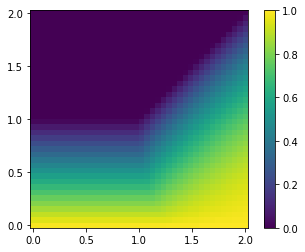

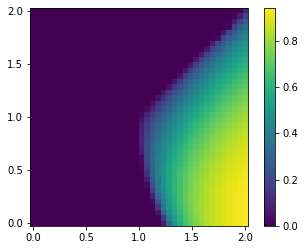

In [ ]:
plt.imshow(q[::-1])
plt.xticks(np.linspace(0,39,5),np.linspace(0,2,5))
plt.yticks(np.linspace(0,39,5),np.linspace(0,2,5)[::-1])
plt.colorbar()
plt.show()

plt.imshow(m[::-1])
plt.xticks(np.linspace(0,39,5),np.linspace(0,2,5))
plt.yticks(np.linspace(0,39,5),np.linspace(0,2,5)[::-1])
plt.colorbar()
plt.show()

# Q2a

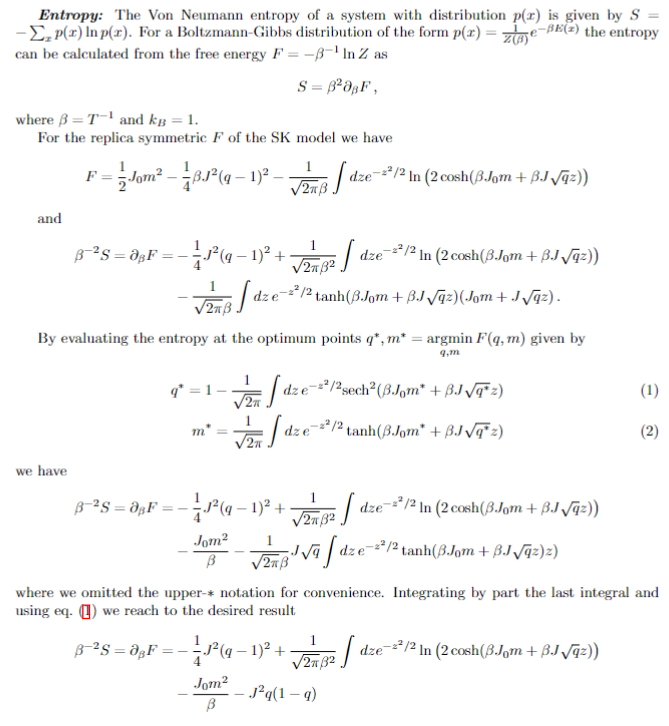

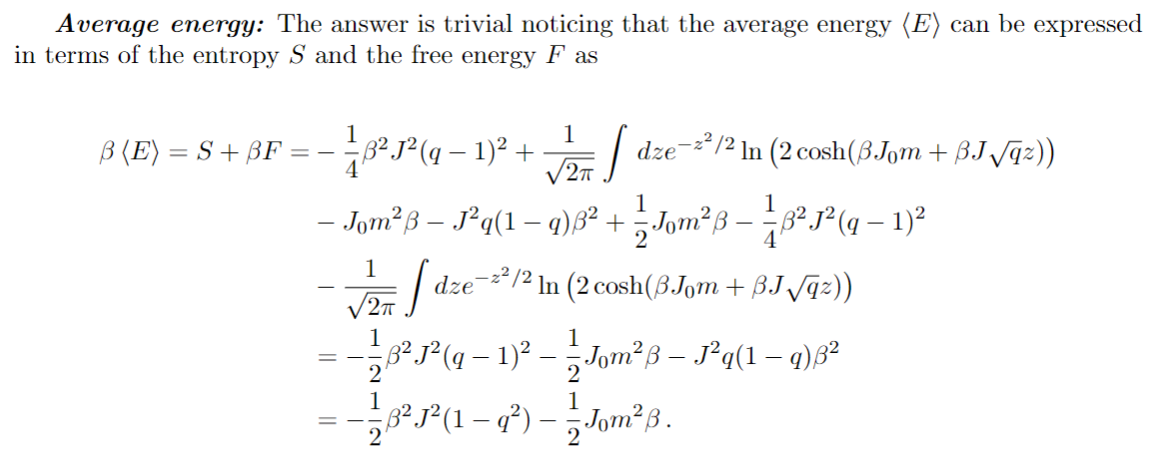

# Q2b

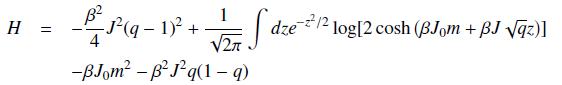

In [ ]:
zmin = -np.inf
zmax = np.inf
H = np.zeros([steps,steps])

In [ ]:
def H_int(z,Jval,J0val,q,m):
  fz = J0val * m + Jval * np.sqrt(q)*z
  return np.exp(-z**2/2) * (np.abs(fz) + np.log(1+np.exp(-2*np.abs(fz))))

for i in range(steps):
  for j in range(steps):
    jval = J[i,j]
    j0val = J0[i,j]
    qval = q[i,j]
    mval = m[i,j]

    preterms = -1/4 * jval**2 * (qval-1)**2  - j0val*mval**2 - jval**2 * qval*(1-qval)
    H_int_calc = integrate.quad(H_int,zmin,zmax,args=(jval,j0val,qval,mval))[0]
    H[i,j] = preterms + cons * H_int_calc


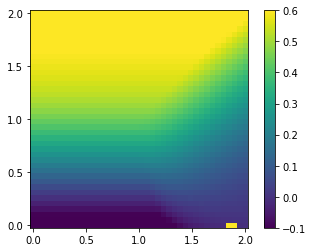

In [ ]:
plt.imshow(H[::-1],vmin = -0.1,vmax = 0.6)
plt.xticks(np.linspace(0,39,5),np.linspace(0,2,5))
plt.yticks(np.linspace(0,39,5),np.linspace(0,2,5)[::-1])
plt.colorbar()
plt.show()

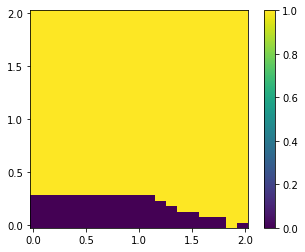

In [ ]:
import copy
Hthresh = copy.deepcopy(H)
Hthresh[Hthresh<0]=0
Hthresh[Hthresh>0]=1

plt.imshow(Hthresh[::-1],vmin = 0, vmax = 1)
plt.xticks(np.linspace(0,39,5),np.linspace(0,2,5))
plt.yticks(np.linspace(0,39,5),np.linspace(0,2,5)[::-1])
plt.colorbar()
plt.show()